In [91]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [92]:
data=pd.read_csv("2018_2019_24-59mos_stunting_complete.csv")

In [93]:
data.describe()

,age_child,agemos,AgeGroup,sex_child,gastation,place_delivery,assistd,typeofd,pregtype,bw_grams,...,drinksafe,makesafe,wcooking,whands,collect,burn,composting,dump,segregate,stunting
count,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,...,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000
mean,3.391328,42.472651,2.039624,1.481295,0.976143,0.888597,0.912316,1.113962,1.012240,2974.954429,...,2.122744,2.345135,11.769587,10.908374,0.463453,0.407372,0.231104,0.192310,0.625199,0.324805
std,0.912131,10.313423,0.812519,0.499667,0.152610,0.314642,0.282845,0.317776,0.111209,598.402473,...,3.610028,3.629395,15.092312,12.844725,0.498680,0.491362,0.421554,0.394129,0.484088,0.468318
min,2.000000,24.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,900.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2629.000000,...,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,43.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3000.000000,...,0.000000,0.000000,8.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,51.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3200.000000,...,1.000000,4.000000,13.000000,13.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,60.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,9500.000000,...,9.000000,9.000000,91.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age_child        14461 non-null  int64
 1   agemos           14461 non-null  int64
 2   AgeGroup         14461 non-null  int64
 3   sex_child        14461 non-null  int64
 4   gastation        14461 non-null  int64
 5   place_delivery   14461 non-null  int64
 6   assistd          14461 non-null  int64
 7   typeofd          14461 non-null  int64
 8   pregtype         14461 non-null  int64
 9   bw_grams         14461 non-null  int64
 10  bw_status        14461 non-null  int64
 11  ethnicity        14461 non-null  int64
 12  age_mom          14461 non-null  int64
 13  agegroup_mom     14461 non-null  int64
 14  csc_mom          14461 non-null  int64
 15  psccat_mom       14461 non-null  int64
 16  educ_mom         14461 non-null  int64
 17  occup_mom        14461 non-null  int64
 18  work_s

In [95]:
#here we check if there is missing values or not 
data.isnull().sum()

age_child          0
agemos             0
AgeGroup           0
sex_child          0
gastation          0
place_delivery     0
assistd            0
typeofd            0
pregtype           0
bw_grams           0
bw_status          0
ethnicity          0
age_mom            0
agegroup_mom       0
csc_mom            0
psccat_mom         0
educ_mom           0
occup_mom          0
work_status_mom    0
age_hh             0
agegroup_HH        0
sex_hh             0
educ_hh            0
psoc_hh            0
work_status_hh     0
urbanity           0
hhsize             0
hhsize_code        0
drinkingwater      0
recipient_4ps      0
toilet             0
drinksafe          0
makesafe           0
wcooking           0
whands             0
collect            0
burn               0
composting         0
dump               0
segregate          0
stunting           0
dtype: int64

In [96]:
df=data.copy() #copy of our data 

<AxesSubplot:>

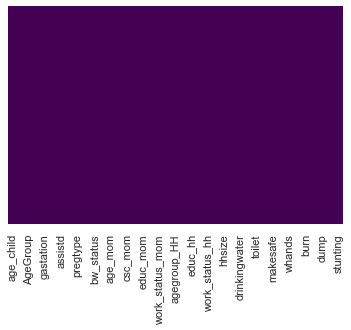

In [97]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

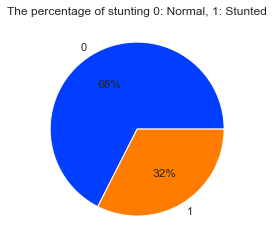

In [98]:
data = df["stunting"].value_counts()
labels = df["stunting"].value_counts().index

palette_color = sns.color_palette('bright')
plt.pie(data, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("The percentage of stunting 0: Normal, 1: Stunted");
#There is 201 null BMI values on the dataset. Additionally the data is imbalance therefore we need to solve these issues for better results.

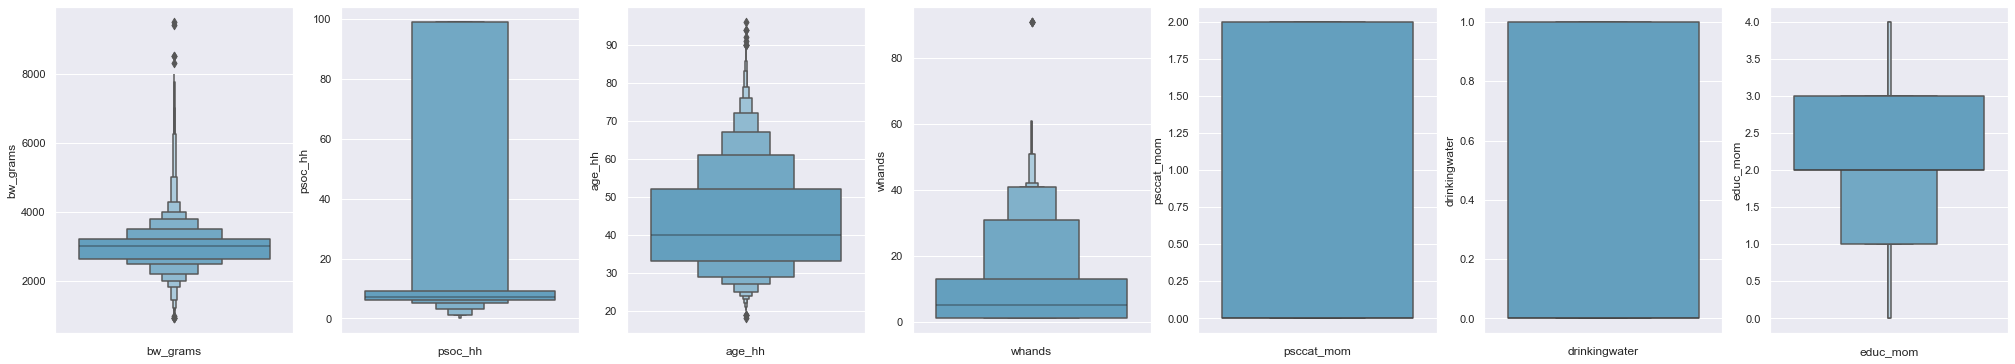

In [99]:
# Set seaborn style palette
sns.set_theme(style="darkgrid", palette="icefire")

# Array of columns that we would like to plot
cols = ['bw_grams','psoc_hh','age_hh',
           'whands','psccat_mom','drinkingwater','educ_mom']

# Instantiate figure and axes for as many subplots as the columns in question
fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

# Draw a Boxen Plot for each column in question
for i in range(len(cols)):
  (sns.boxenplot(y=df[cols[i]],data=df, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

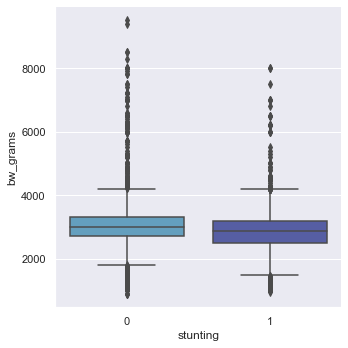

In [100]:
sns.catplot(data=df, x="stunting", y="bw_grams", kind="box") #checking for outliers

In [101]:
indexAge = data[((df['bw_grams'] < 2000) & (df['stunting'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bw_grams'] > 4100) & (df['stunting'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bw_grams'] < 1800) & (df['stunting'] == 1)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bw_grams'] > 4000) & (df['stunting'] == 1)) ].index
data.drop(indexAge , inplace=True)

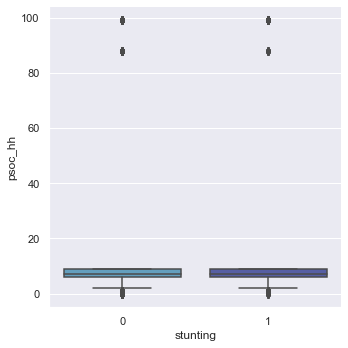

In [102]:
sns.catplot(data=df, x="stunting", y="psoc_hh", kind="box") #checking for outliers

In [103]:
indexAge = data[((df['psoc_hh'] < 5) & (df['stunting'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['psoc_hh'] > 80) & (df['stunting'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['psoc_hh'] < 5) & (df['stunting'] == 1)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['psoc_hh'] > 80) & (df['stunting'] == 1)) ].index
data.drop(indexAge , inplace=True)

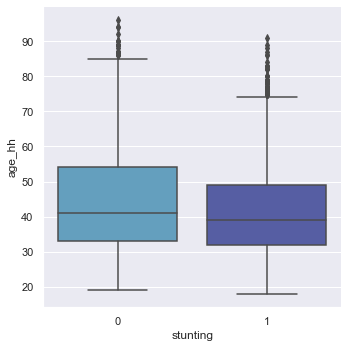

In [104]:
sns.catplot(data=df, x="stunting", y="age_hh", kind="box") #checking for outliers

In [105]:
indexAge = data[((df['age_hh'] > 85) & (df['stunting'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['age_hh'] > 73) & (df['stunting'] == 1)) ].index
data.drop(indexAge , inplace=True)

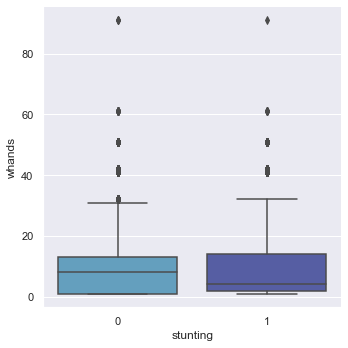

In [106]:
sns.catplot(data=df, x="stunting", y="whands", kind="box") #checking for outliers

In [107]:
indexAge = data[((df['whands'] > 30) & (df['stunting'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['whands'] > 41) & (df['stunting'] == 1)) ].index
data.drop(indexAge , inplace=True)

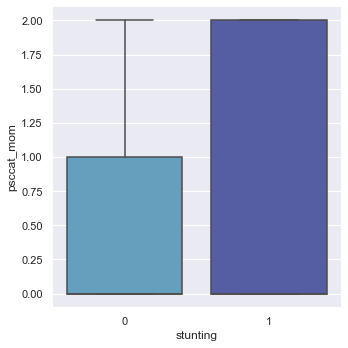

In [108]:
sns.catplot(data=df, x="stunting", y="psccat_mom", kind="box") #checking for outliers

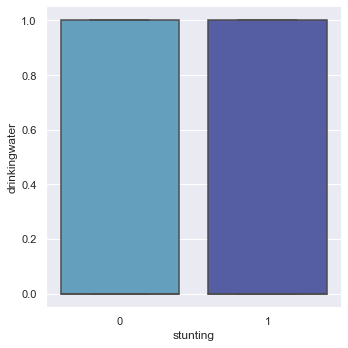

In [109]:
sns.catplot(data=df, x="stunting", y="drinkingwater", kind="box") #checking for outliers

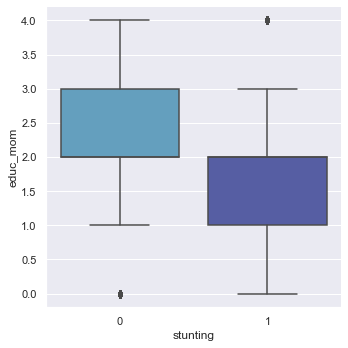

In [110]:
sns.catplot(data=df, x="stunting", y="educ_mom", kind="box") #checking for outliers

In [111]:
indexAge = data[((df['educ_mom'] < 0) & (df['stunting'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['educ_mom'] > 4) & (df['stunting'] == 1)) ].index
data.drop(indexAge , inplace=True)

0    9764
1    4697
Name: stunting, dtype: int64


<AxesSubplot:>

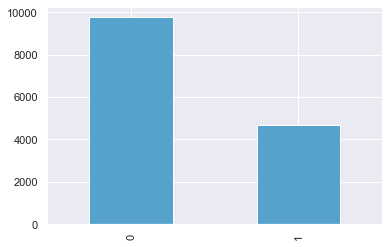

In [112]:
##### show the value counts of the calsses in the target
#we can find data impalance
print(df['stunting'].value_counts())
df['stunting'].value_counts().sort_index().plot.bar()

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [114]:
X = df[["bw_grams","psoc_hh","age_hh",
           "whands","psccat_mom"]]
y = df["stunting"].to_frame()

In [115]:
X_train, x_test, y_train , y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [116]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X = df[["bw_grams","psoc_hh","age_hh",
           "whands","psccat_mom"]]
y = df["stunting"]
X_over, y_over = oversample.fit_resample(X, y)

In [117]:
# Apply oversampling
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X, y.ravel())

1    9764
0    9764
Name: stunting, dtype: int64


<AxesSubplot:>

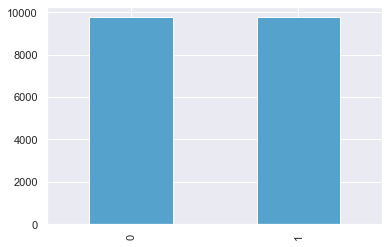

In [118]:
print(y_over.value_counts())
y_over.value_counts().sort_index().plot.bar()

# MODELING 

In [119]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt

# XGBOOST MODEL

In [120]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1, random_state=0)
xgb.fit(X_balanced, y_balanced)

y_pred_train_xgb = xgb.predict(X_balanced)
acc_train_xgb = accuracy_score(y_balanced, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(acc_train_xgb)
print(acc_test_xgb)

xgb_perc_score = precision_score(y_test, y_pred_test_xgb)
xgb_rec_score= recall_score(y_test, y_pred_test_xgb)
xgb_f1_score = f1_score(y_test, y_pred_test_xgb)

print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F-measure: %.3f' % xgb_f1_score)

y_pred_prob_xgb = xgb.predict_proba(x_test)[:, 1]
xgb_roc_auc_score = roc_auc_score(y_test, y_pred_prob_xgb)
print('ROC AUC Score:', xgb_roc_auc_score)

0.6839922163047931
0.6573561946902655
Precision: 0.471
Recall: 0.602
F-measure: 0.528
ROC AUC Score: 0.7074515491899365


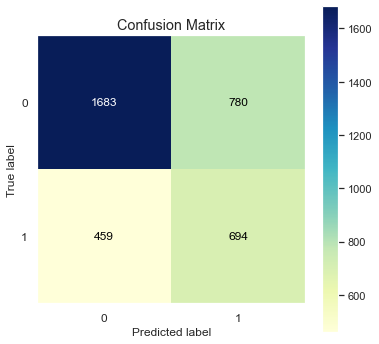

In [121]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_xgb, figsize=(6,6), cmap= 'YlGnBu');

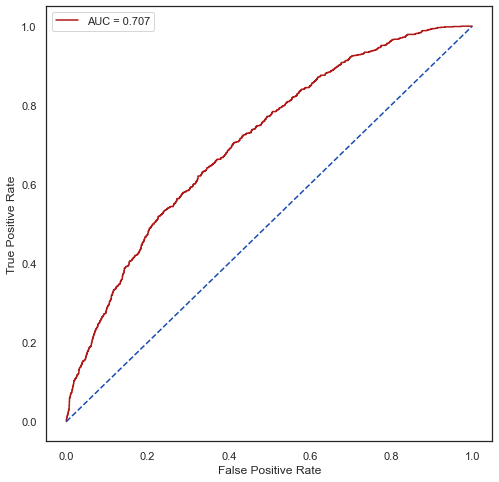

In [122]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# SVM MODEL

In [123]:
svc = SVC(C=10, gamma=1000 ,probability= True)
svc.fit(X_balanced, y_balanced)

y_pred_train_svc = svc.predict(X_balanced)
acc_train_svc = accuracy_score(y_balanced, y_pred_train_svc)

y_pred_test_svc = svc.predict(x_test)
acc_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(acc_train_svc)
print(acc_test_svc)

svc_perc_score = precision_score(y_test, y_pred_test_svc)
svc_rec_score= recall_score(y_test, y_pred_test_svc)
svc_f1_score = f1_score(y_test, y_pred_test_svc)

print('Precision: %.3f' % svc_perc_score)
print('Recall: %.3f' % svc_rec_score)
print('F-measure: %.3f' % svc_f1_score)

y_pred_prob_svc = svc.predict_proba(x_test)[:, 1]
svc_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_svc)
print('ROC AUC Score:', svc_roc_auc_score)

0.9652294141745187
0.9676438053097345
Precision: 0.956
Recall: 0.942
F-measure: 0.949
ROC AUC Score: 0.9868802421545729


In [124]:
x_test.head()

,bw_grams,psoc_hh,age_hh,whands,psccat_mom
2900,3200,9,40,1,0
13523,2800,6,65,11,0
10043,2800,8,26,11,2
7900,3000,9,65,13,2
3479,2500,8,38,2,2


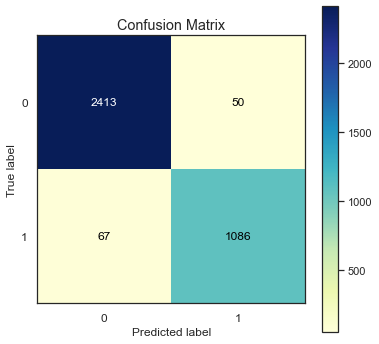

In [125]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_svc, figsize=(6,6), cmap= 'YlGnBu');

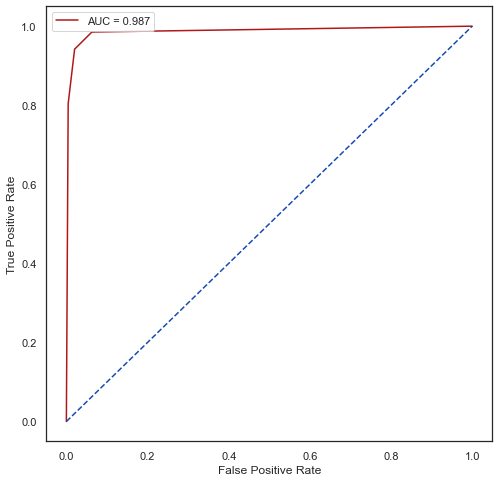

In [126]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_svc)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# DECISION TREE MODEL

In [127]:
dt =DecisionTreeClassifier(max_features=5 , max_depth=12,criterion = 'entropy', random_state=0)
dt.fit(X_balanced, y_balanced)

y_pred_train_dt = dt.predict(X_balanced)
acc_train_dt = accuracy_score(y_balanced, y_pred_train_dt)

y_pred_test_dt = dt.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

dt_perc_score = precision_score(y_test, y_pred_test_dt)
dt_rec_score= recall_score(y_test, y_pred_test_dt)
dt_f1_score = f1_score(y_test, y_pred_test_dt)

print('Precision: %.3f' % dt_perc_score)
print('Recall: %.3f' % dt_rec_score)
print('F-measure: %.3f' % dt_f1_score)

y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]
dt_roc_auc_score = roc_auc_score(y_test, y_pred_prob_dt)
print('ROC AUC Score:', dt_roc_auc_score)

0.6933633756657108
0.6722898230088495
Precision: 0.490
Recall: 0.692
F-measure: 0.574
ROC AUC Score: 0.7492389533350308


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

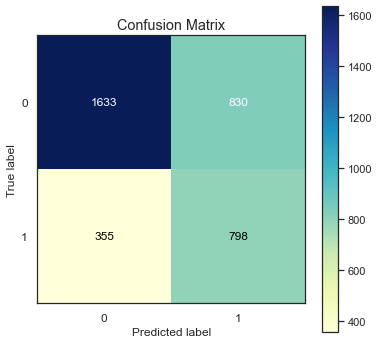

In [128]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_dt, figsize=(6,6), cmap= 'YlGnBu')

# RANDOM FOREST CLASSIFIER

In [184]:
rf = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state = 0)
rf.fit(X_balanced,y_balanced)

RandomForestClassifier(criterion='entropy', random_state=0)

In [185]:
y_pred_train_rf = rf.predict(X_balanced)
acc_train_rf = accuracy_score(y_balanced, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

0.9652294141745187
0.9593473451327433


In [186]:
y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
rf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', rf_roc_auc_score)

ROC AUC Score: 0.9929460789854636


In [187]:
rf_perc_score = precision_score(y_test, y_pred_test_rf)
rf_rec_score= recall_score(y_test, y_pred_test_rf)
rf_f1_score = f1_score(y_test, y_pred_test_rf)

print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)

Precision: 0.914
Recall: 0.963
F-measure: 0.938


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

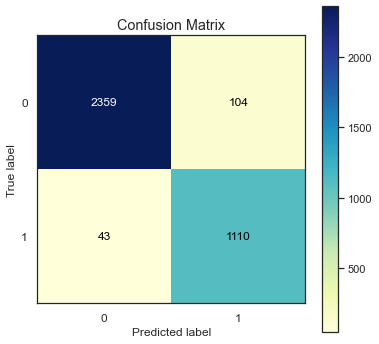

In [188]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_rf, figsize=(6,6), cmap= 'YlGnBu')

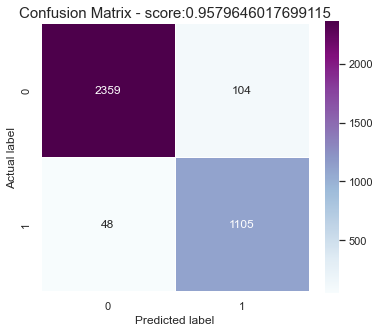

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2463
           1       0.91      0.96      0.94      1153

    accuracy                           0.96      3616
   macro avg       0.95      0.96      0.95      3616
weighted avg       0.96      0.96      0.96      3616



In [189]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_balanced,y_balanced)
y_pred=rf_model.predict(x_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

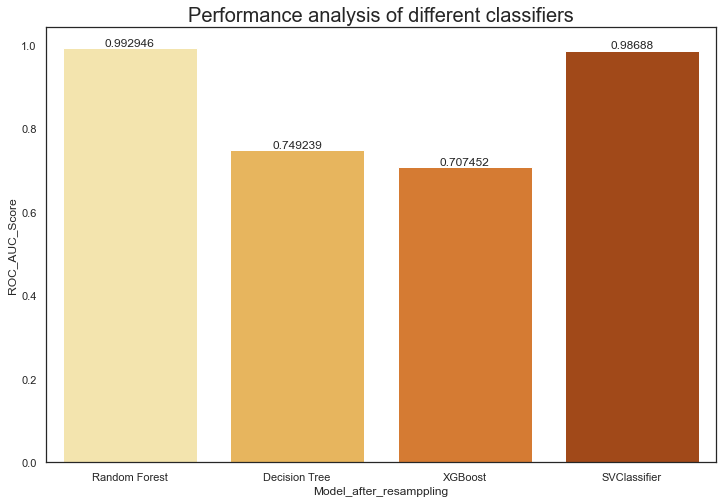

In [190]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['Random Forest','Decision Tree','XGBoost','SVClassifier'],
        'Score': [acc_test_rf, acc_test_dt, acc_test_xgb, acc_test_svc],
        
        'ROC_AUC_Score': [rf_roc_auc_score, dt_roc_auc_score, xgb_roc_auc_score, svc_roc_auc_score]
    }
)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resamppling", y="ROC_AUC_Score", data= Performance, palette="YlOrBr")
ax.bar_label(ax.containers[0])
plt.title('Performance analysis of different classifiers',fontsize=20)
plt.show()

In [191]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

,Model_after_resamppling,Score,ROC_AUC_Score
0,Random Forest,0.959347,0.992946
3,SVClassifier,0.967644,0.986880
1,Decision Tree,0.672290,0.749239
2,XGBoost,0.657356,0.707452


In [155]:
X_train

,bw_grams,psoc_hh,age_hh,whands,psccat_mom
11131,2700,8,39,32,0
2532,2500,7,52,1,1
6803,3500,6,45,4,0
7401,1700,6,68,13,0
11880,2600,1,38,41,0
...,...,...,...,...,...
5191,3400,99,66,1,0
13418,3000,9,48,12,0
5390,2800,8,38,1,0
860,3300,8,41,1,0


In [156]:
x_test

,bw_grams,psoc_hh,age_hh,whands,psccat_mom
2900,3200,9,40,1,0
13523,2800,6,65,11,0
10043,2800,8,26,11,2
7900,3000,9,65,13,2
3479,2500,8,38,2,2
...,...,...,...,...,...
12829,3000,8,36,14,0
8998,2200,1,51,11,0
11436,2900,4,30,41,0
14055,2500,6,50,11,0


In [157]:
y_test

,stunting
2900,0
13523,0
10043,0
7900,1
3479,1
...,...
12829,0
8998,1
11436,0
14055,1


In [194]:
rf.predict([[2500,6,50,11,0]])

array([1], dtype=int64)

In [192]:
import pickle
with open('stunting_59mos_rf.pkl','wb') as file:
    pickle.dump(svc,file)
x_test.to_csv("X_test_stuntingt.csv")
y_test.to_csv("y_test_stunting.csv")